The analysis had been done on the pivot_data_Liberia_malariapercounty.csv file. This file has been prepared by Dorothea from our team. This file has been created from the datasets uploaded on Dagshub.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pivot_data_Liberia_malariapercounty.csv")

In [3]:
df.head()

,Name,Year,Cases_Value,Deaths_Value
0,Bomi,2010,39421.904528,157.506441
1,Bomi,2011,39033.880960,155.825758
2,Bomi,2012,38417.442370,129.673104
3,Bomi,2013,40641.751749,119.172710
4,Bomi,2014,43748.805917,132.335863


In [8]:
type(df.Year.iloc[0])

numpy.int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          165 non-null    object 
 1   Year          165 non-null    int64  
 2   Cases_Value   165 non-null    float64
 3   Deaths_Value  165 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


In [ ]:
df.describe()

,Year,Cases_Value,Deaths_Value
count,165.000000,165.000000,165.000000
mean,2015.000000,107755.409453,324.809396
std,3.171904,87408.856616,216.522862
min,2010.000000,28316.523039,88.815922
25%,2012.000000,48713.059649,167.556260
50%,2015.000000,75791.380015,253.883940
75%,2018.000000,145531.780324,430.651345
max,2020.000000,474933.494736,1018.928272


In [ ]:
df.isnull().sum()

Name            0
Year            0
Cases_Value     0
Deaths_Value    0
dtype: int64

In [ ]:
for columns in df.columns:
  print(f"{columns} : {df[columns].isnull().sum()}")

Name : 0
Year : 0
Cases_Value : 0
Deaths_Value : 0


In [ ]:
df['Name'].unique()

array(['Bomi', 'Bong', 'Gbapolu', 'Grand Bassa', 'Grand Cape Mount',
       'Grand Gedeh', 'Grand Kru', 'Lofa', 'Margibi', 'Maryland',
       'Montserrado', 'Nimba', 'River Cess', 'River Gee', 'Sinoe'],
      dtype=object)

<Axes: xlabel='Name'>

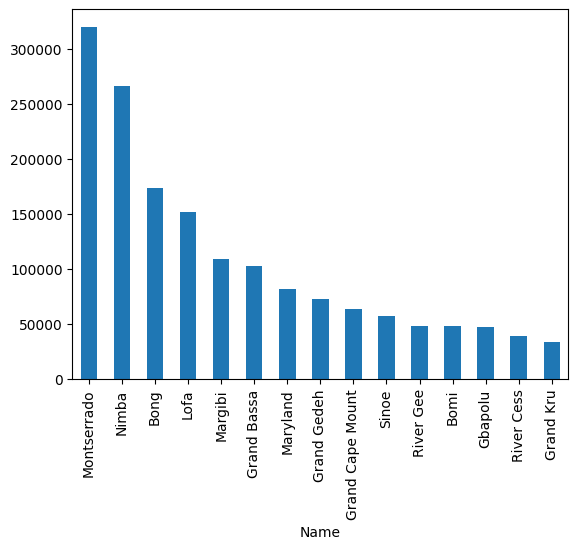

In [ ]:
df.groupby('Name')['Cases_Value'].mean().sort_values(ascending=False).plot.bar()

<Axes: xlabel='Name'>

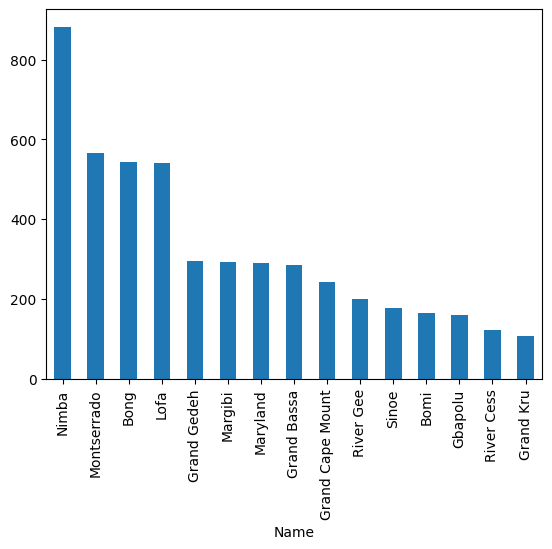

In [ ]:
df.groupby('Name')['Deaths_Value'].mean().sort_values(ascending=False).plot.bar()

<Axes: xlabel='Cases_Value', ylabel='Deaths_Value'>

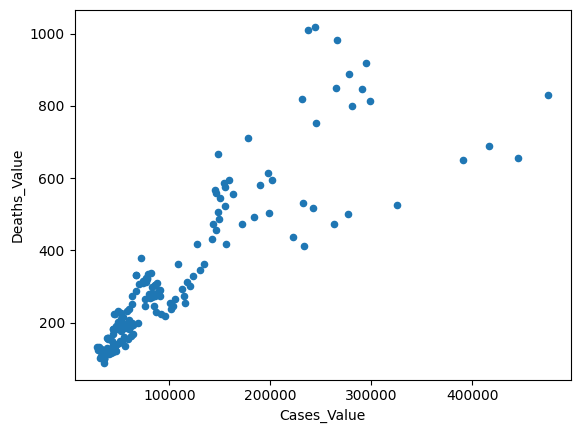

In [ ]:
df.plot.scatter(x='Cases_Value',y='Deaths_Value')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Name'])
df['Region'] = encoder.transform(df['Name'])

In [ ]:
encoder.classes_

array(['Bomi', 'Bong', 'Gbapolu', 'Grand Bassa', 'Grand Cape Mount',
       'Grand Gedeh', 'Grand Kru', 'Lofa', 'Margibi', 'Maryland',
       'Montserrado', 'Nimba', 'River Cess', 'River Gee', 'Sinoe'],
      dtype=object)

In [ ]:
df

,Name,Year,Cases_Value,Deaths_Value,Region
0,Bomi,2010,39421.904528,157.506441,0
1,Bomi,2011,39033.880960,155.825758,0
2,Bomi,2012,38417.442370,129.673104,0
3,Bomi,2013,40641.751749,119.172710,0
4,Bomi,2014,43748.805917,132.335863,0
...,...,...,...,...,...
160,Sinoe,2016,63628.505842,167.958324,14
161,Sinoe,2017,64100.238249,192.790002,14
162,Sinoe,2018,63174.831790,199.265331,14
163,Sinoe,2019,60955.889161,189.794016,14


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Cases_Value','Deaths_Value']] = scaler.fit_transform(df[['Cases_Value','Deaths_Value']])

In [ ]:
df

,Name,Year,Cases_Value,Deaths_Value,Region
0,Bomi,2010,0.024866,0.073852,0
1,Bomi,2011,0.023997,0.072045,0
2,Bomi,2012,0.022617,0.043927,0
3,Bomi,2013,0.027597,0.032638,0
4,Bomi,2014,0.034554,0.046790,0
...,...,...,...,...,...
160,Sinoe,2016,0.079065,0.085089,14
161,Sinoe,2017,0.080122,0.111787,14
162,Sinoe,2018,0.078050,0.118748,14
163,Sinoe,2019,0.073081,0.108565,14


In [ ]:
df_new  = df.drop(columns=['Name'])

In [ ]:
df_new

,Year,Cases_Value,Deaths_Value,Region
0,2010,0.024866,0.073852,0
1,2011,0.023997,0.072045,0
2,2012,0.022617,0.043927,0
3,2013,0.027597,0.032638,0
4,2014,0.034554,0.046790,0
...,...,...,...,...
160,2016,0.079065,0.085089,14
161,2017,0.080122,0.111787,14
162,2018,0.078050,0.118748,14
163,2019,0.073081,0.108565,14


In [ ]:
# Convert 'Year' column to datetime format
df_new['Year'] = pd.to_datetime(df_new['Year'], format='%Y')

In [ ]:
# Set 'Year' column as index
df_new.set_index('Year', inplace=True)

<Axes: xlabel='Region'>

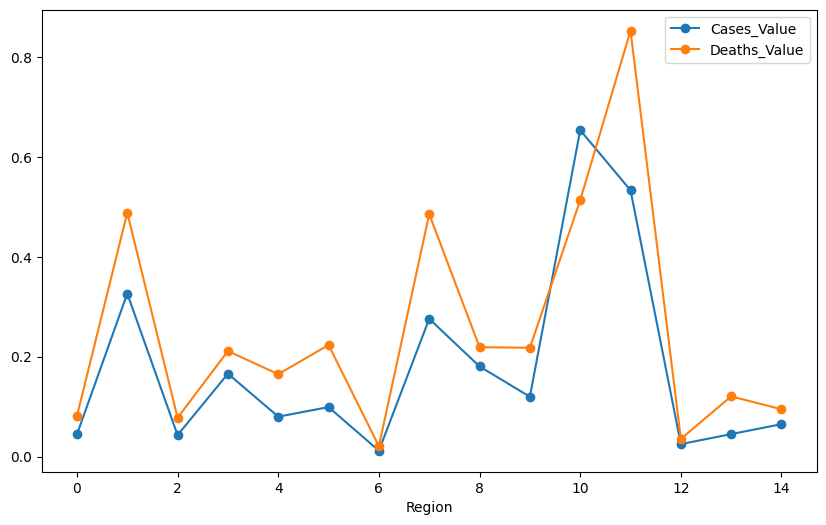

In [ ]:
df_new.groupby('Region')[['Cases_Value','Deaths_Value']].mean().plot(figsize=(10,6),marker='o',x=encoder.classes_)

<Axes: xlabel='Year'>

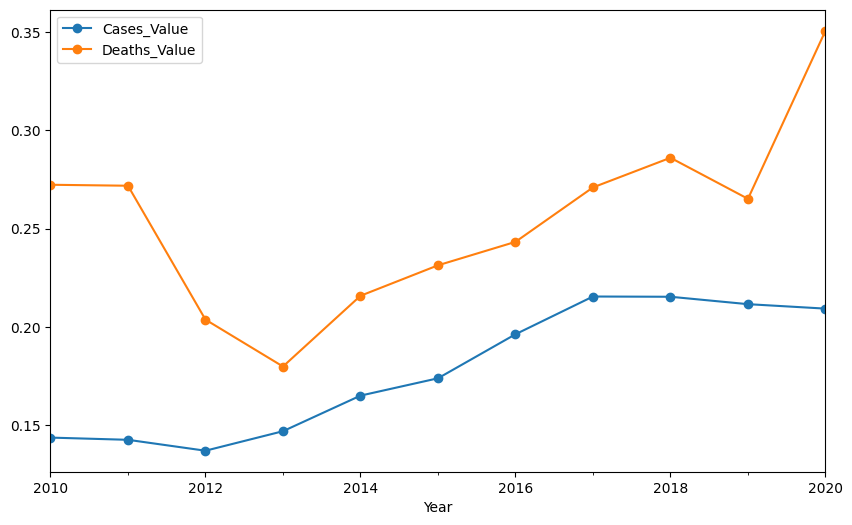

In [ ]:
df_new.groupby(['Year'])[['Cases_Value','Deaths_Value']].mean().plot(figsize=(10,6),marker='o')